# **USA housing price. Exploration analysis**


## Objectives


-   Load and explore the dataset.
-   Find general relationships between variables.

## Load the dataset


Import the required libraries.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataset was donwloaded from kaggel.com. It can be found as *USA_housing.csv*. Then, let's load the dataset into a dataframe.


In [2]:
df=pd.read_csv('C:/Users/Lenovo/Desktop/csv_github/USA_housing.csv')

## Explore the dataset


Now, let's take a look at the data and its general features.

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [4]:
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Even though the data shows no null values, it's important to validate data integrity. Also, we can round the decimal figures to 2.

In [5]:
print('Nulls:', df.isnull().sum().sum())
print('Duplicates:', df.duplicated().sum())
df = df.round(2)

Nulls: 0
Duplicates: 0


## Exploratory Analisys (EDA)


Start by exploring the prices distribution through a plot


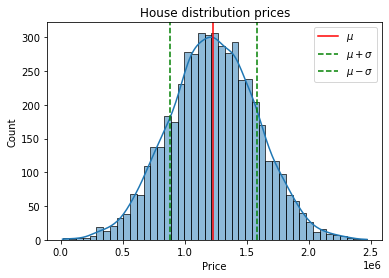

In [6]:
sns.histplot(df['Price'], kde=True)
plt.title('House distribution prices')
mean = np.mean(df['Price'])
sigma = np.std(df['Price'])

plt.axvline(mean, color='r', linestyle='-', label='$\mu$')
plt.axvline(mean + sigma, color='g', linestyle='--', label='$\mu + \sigma$')
plt.axvline(mean - sigma, color='g', linestyle='--', label='$\mu - \sigma$')

plt.legend()
plt.show()

The target variable `Price` follows a nearly perfect Gaussian distribution. This suggests that the real estate market in this dataset is stable, without extreme outliers or heavy skewness that could bias a future regression model. The mean price is centered around $1.2M, with a standard deviation that reflects a healthy variability in property values.

Now, let's see if there is any correlation between variables, through a correlation matrix.

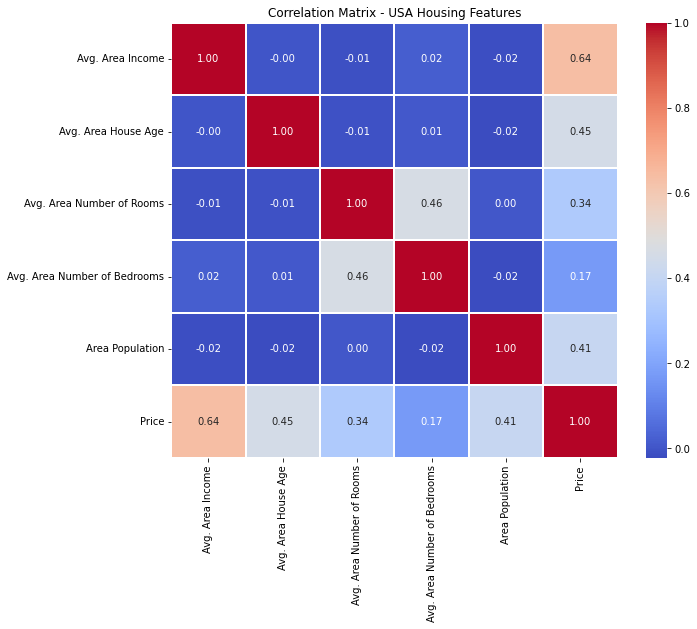

The Pearson correlation coefficient between each variable and Price:
Avg. Area Income                0.639734
Avg. Area House Age             0.452575
Area Population                 0.408556
Avg. Area Number of Rooms       0.335651
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64


In [7]:
numeric_df = df.select_dtypes(include=['float64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.23)
plt.title('Correlation Matrix - USA Housing Features')
plt.show()

print("The Pearson correlation coefficient between each variable and Price:")
print(correlation_matrix['Price'][0:5].sort_values(ascending=False))

It can be seen a strong relationship between `Price` and `Avg. Area Incame`, while the variables `Avg. Area House Age`, `Area Population`, `Avg. Area Number of Rooms`, and `Avg. Area Number of Bedrooms` have lower correlation coefficient. Finally, there is no correlation with `Avg. Area Number of Bedrooms`.
Also, it can be seen the relationships explicity through a Pairplot.

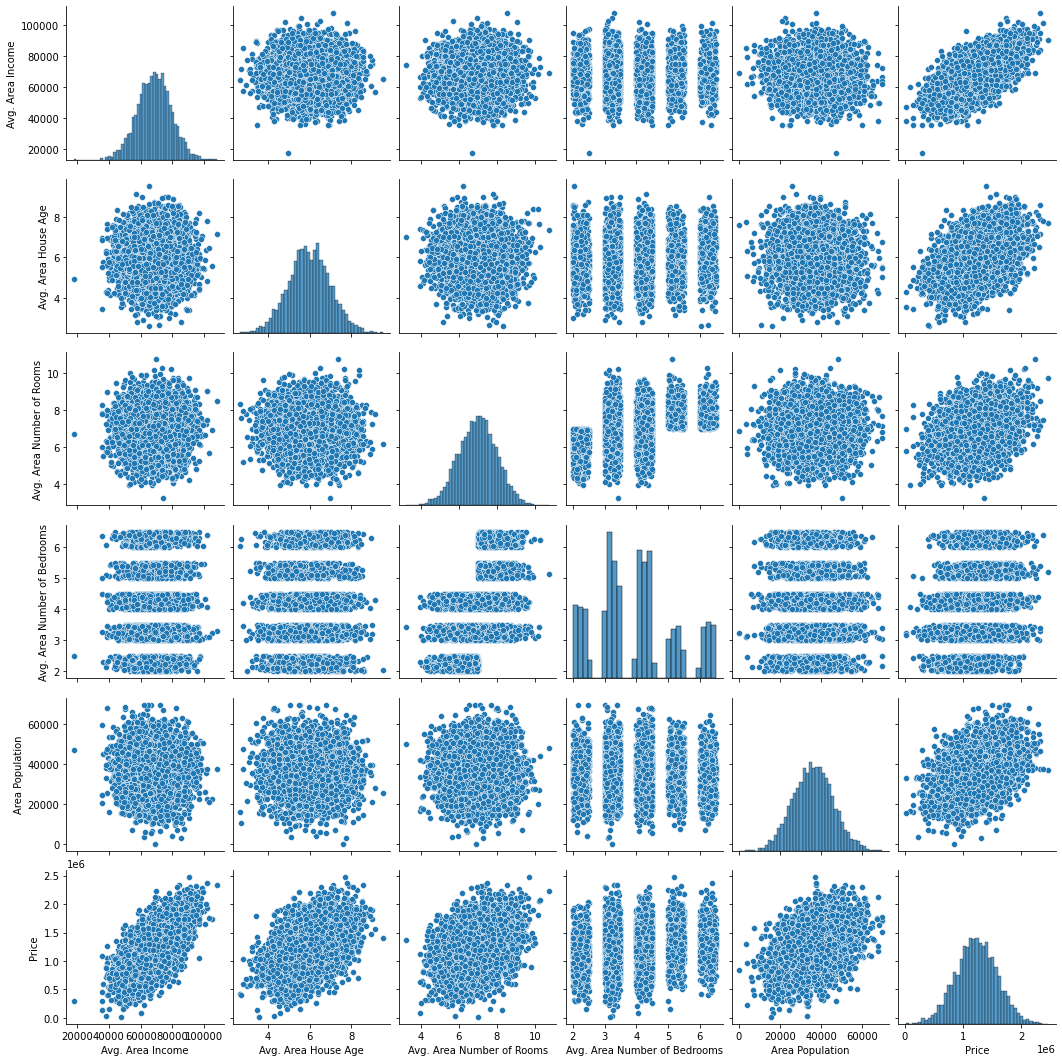

In [8]:
sns.pairplot(df)

Here we can observe no outliers in `Price` vs. `Avg.Area Income`, strengthening the relationship between the variables. It's also shown the slight relationship with the others variables.

It could be usefull to analize new variables, like `Price_per_room`=`Price` / `Avg. Area Number of Bedrooms`. And, also, replace empty spaces in columns names for `_`, for future analyses.

In [9]:
df['Price_per_Bedroom'] = (df['Price'] / df['Avg. Area Number of Bedrooms']).round(2)

In [10]:
df.columns = df.columns.str.replace(' ', '_')
df.head(4)

,Avg._Area_Income,Avg._Area_House_Age,Avg._Area_Number_of_Rooms,Avg._Area_Number_of_Bedrooms,Area_Population,Price,Address,Price_per_Bedroom
0,79545.46,5.68,7.01,4.09,23086.80,1059033.56,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",258932.41
1,79248.64,6.00,6.73,3.09,40173.07,1505890.91,"188 Johnson Views Suite 079\nLake Kathleen, CA...",487343.34
2,61287.07,5.87,8.51,5.13,36882.16,1058987.99,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",206430.41
3,63345.24,7.19,5.59,3.26,34310.24,1260616.81,USS Barnett\nFPO AP 44820,386692.27


Now, we'll save the dataframe as a csv file to continuing our work with the new file.

In [11]:
df.to_csv('USA_housing_clean.csv', index=False, encoding='utf-8-sig')

Next step, build up a dashboard in Power BI to show the information more clearly.